### 서울시 유가 정보 분석

In [331]:
# !pip install xlrd

In [332]:
import pandas as pd
from glob import glob   # 파일 이름 불러오는 역할
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [333]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [334]:
station_files = glob("../Data/oil/*.xls")
station_files

['../Data/oil/지역_위치별(주유소) (9).xls',
 '../Data/oil/지역_위치별(주유소) (12).xls',
 '../Data/oil/지역_위치별(주유소) (5).xls',
 '../Data/oil/지역_위치별(주유소) (24).xls',
 '../Data/oil/지역_위치별(주유소) (4).xls',
 '../Data/oil/지역_위치별(주유소) (13).xls',
 '../Data/oil/지역_위치별(주유소) (8).xls',
 '../Data/oil/지역_위치별(주유소) (3).xls',
 '../Data/oil/지역_위치별(주유소) (18).xls',
 '../Data/oil/지역_위치별(주유소) (22).xls',
 '../Data/oil/지역_위치별(주유소) (14).xls',
 '../Data/oil/지역_위치별(주유소) (15).xls',
 '../Data/oil/지역_위치별(주유소) (23).xls',
 '../Data/oil/지역_위치별(주유소) (19).xls',
 '../Data/oil/지역_위치별(주유소) (2).xls',
 '../Data/oil/지역_위치별(주유소) (20).xls',
 '../Data/oil/지역_위치별(주유소) (1).xls',
 '../Data/oil/지역_위치별(주유소) (16).xls',
 '../Data/oil/지역_위치별(주유소) (17).xls',
 '../Data/oil/지역_위치별(주유소) (21).xls',
 '../Data/oil/지역_위치별(주유소) (10).xls',
 '../Data/oil/지역_

In [335]:
tmp_raw = []
for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
station_raw = pd.concat(tmp_raw)
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,1525,1585,1400
1,서울특별시,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),S-OIL,02-992-0220,Y,-,1525,1585,-
2,서울특별시,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),현대오일뱅크,02-954-4555,Y,1760,1525,1585,-
3,서울특별시,현대오일뱅크㈜직영 도봉현대셀프주유소,서울 도봉구 도봉로 941 (도봉동),현대오일뱅크,02-3492-7371,Y,-,1529,1599,-
4,서울특별시,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),SK에너지,02-992-5561,Y,-,1535,1585,1500


In [336]:
len(station_raw)

443

In [337]:
# null값, 데이터타입 확인, 
# object 는 null값에 - 가 들어가 있어서다.
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 8
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      443 non-null    object
 1   상호      443 non-null    object
 2   주소      443 non-null    object
 3   상표      443 non-null    object
 4   전화번호    443 non-null    object
 5   셀프여부    443 non-null    object
 6   고급휘발유   443 non-null    object
 7   휘발유     443 non-null    int64 
 8   경유      443 non-null    int64 
 9   실내등유    443 non-null    object
dtypes: int64(2), object(8)
memory usage: 38.1+ KB


In [338]:
# 필요 항목 발췌(Dictionary 사용)
stations = pd.DataFrame(
    {
        'Oil_store' : station_raw['상호'],
        '주소' : station_raw['주소'],
        '가격' : station_raw['휘발유'],
        '셀프' : station_raw['셀프여부'],
        '상표' : station_raw['상표'],
    }
)
stations.head()

,Oil_store,주소,가격,셀프,상표
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1525,N,현대오일뱅크
1,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1525,Y,S-OIL
2,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1525,Y,현대오일뱅크
3,현대오일뱅크㈜직영 도봉현대셀프주유소,서울 도봉구 도봉로 941 (도봉동),1529,Y,현대오일뱅크
4,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1535,Y,SK에너지


In [339]:
# 데이터 표 만들고 info 확인
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 8
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  443 non-null    object
 1   주소         443 non-null    object
 2   가격         443 non-null    int64 
 3   셀프         443 non-null    object
 4   상표         443 non-null    object
dtypes: int64(1), object(4)
memory usage: 20.8+ KB


In [340]:
# 주유소별 자치구 항목 추가
stations['구'] = [region.split()[1] for region in stations['주소']]
stations.tail()

# str = "Life is too short to be happy."
# list01 = str.split()

# stations['주소'].iloc[0].split(" ")[1]

# 잘못됨
# for i in range(len(stations['주소'])):
#     stations['구'] = stations['주소'].iloc[i].split(" ")[1]
    
# stations

,Oil_store,주소,가격,셀프,상표,구
4,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),1619,Y,GS칼텍스,동작구
5,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1619,Y,현대오일뱅크,동작구
6,현대오일뱅크(주)직영 사당셀프주유소,서울 동작구 동작대로 73 (사당동),1619,Y,현대오일뱅크,동작구
7,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1629,N,현대오일뱅크,동작구
8,살피재주유소,서울 동작구 상도로 334,1765,N,SK에너지,동작구


In [341]:
# 구 컬럼 확인
stations['구'].unique()
len(stations['구'].unique())

25

In [342]:
# 여러개 파일을 합하여 만든 데이터셋이기 때문에 index가 중복되어 있다.
stations.reset_index(inplace=True, drop=True)
# stations.drop('index', axis = 1, inplace=True)
stations

,Oil_store,주소,가격,셀프,상표,구
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1525,N,현대오일뱅크,도봉구
1,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1525,Y,S-OIL,도봉구
2,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1525,Y,현대오일뱅크,도봉구
3,현대오일뱅크㈜직영 도봉현대셀프주유소,서울 도봉구 도봉로 941 (도봉동),1529,Y,현대오일뱅크,도봉구
4,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1535,Y,SK에너지,도봉구
...,...,...,...,...,...,...
438,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),1619,Y,GS칼텍스,동작구
439,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1619,Y,현대오일뱅크,동작구
440,현대오일뱅크(주)직영 사당셀프주유소,서울 동작구 동작대로 73 (사당동),1619,Y,현대오일뱅크,동작구
441,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1629,N,현대오일뱅크,동작구


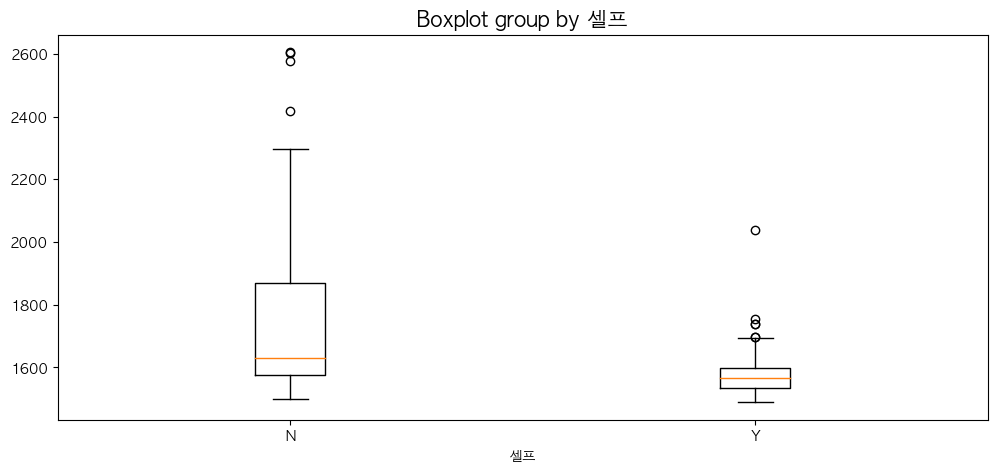

In [343]:
# 셀프와 셀프가 아닌 주유소의 가격 차이를 boxplot으로 확인

#그림 키워주기
fig = plt.figure(figsize=(12, 5))


plt.boxplot(
    x=[
        stations[stations['셀프'] == 'N']['가격'],
        stations[stations['셀프'] == 'Y']['가격'],
    ],
    labels=stations.셀프.unique()
)
plt.title('Boxplot group by 셀프', size=15)
plt.xlabel('셀프')
plt.show()

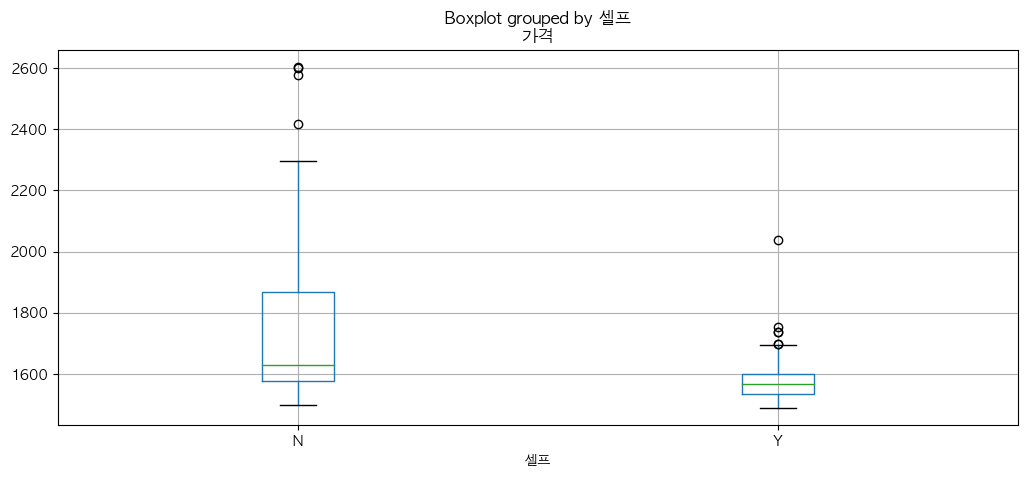

In [344]:
# boxplot
stations.boxplot(column='가격', by='셀프', figsize=(12,5))
plt.show()

In [345]:
import seaborn as sns

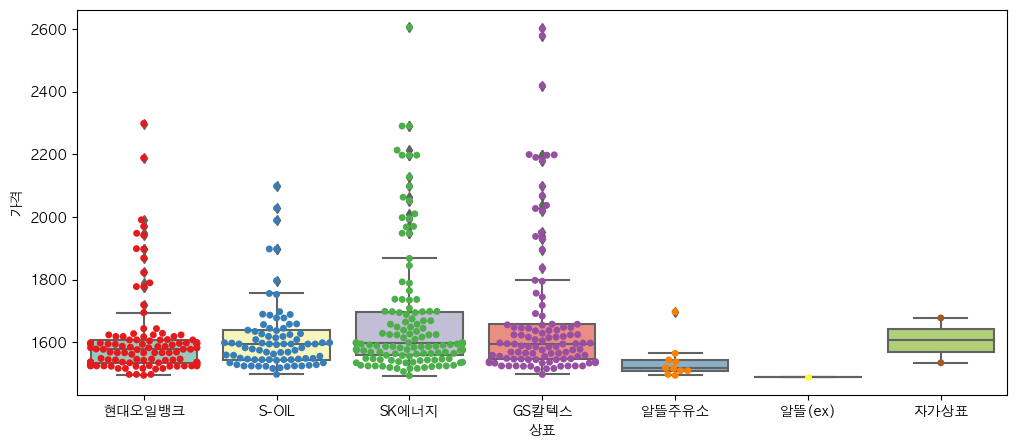

In [346]:
# 상표, 가격, 셀프를 boxplot으로 그리기
plt.figure(figsize=(12, 5))
sns.boxplot(
    x='상표',
    y='가격',
    # hue='셀프',
    data=stations,
    palette='Set3'
)

sns.swarmplot(
    x='상표',
    y='가격',
    data=stations,
    # hue='셀프',
    legend=False,
    palette='Set1'
)

plt.show()

In [347]:
# 가격이 높은 순으로 정렬 (top10)
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
218,서남주유소,서울 중구 통일로 30,2605,N,SK에너지,중구
269,서계주유소,서울 용산구 청파로 367 (청파동),2601,N,GS칼텍스,용산구
402,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스,강남구
217,필동주유소,서울 중구 퇴계로 196 (필동2가),2419,N,GS칼텍스,중구
401,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2298,N,현대오일뱅크,강남구
400,SK논현주유소,서울 강남구 논현로 747 (논현동),2290,N,SK에너지,강남구
399,갤러리아주유소,서울 강남구 압구정로 426,2290,N,SK에너지,강남구
268,한석주유소,서울 용산구 이촌로 164,2213,N,SK에너지,용산구
245,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2199,N,GS칼텍스,영등포구
433,구로주유소,서울 구로구 구로동로 137 (구로동),2198,N,GS칼텍스,구로구


In [348]:
# 가격이 낮은 순으로 정렬 (top10)
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
163,만남의광장주유소,서울 서초구 양재대로12길 73-71,1489,Y,알뜰(ex),서초구
337,타이거주유소,서울 은평구 수색로 188 (증산동),1494,Y,SK에너지,은평구
98,화곡역주유소,서울 강서구 강서로 154 (화곡동),1495,Y,알뜰주유소,강서구
99,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1495,Y,현대오일뱅크,강서구
134,현대오일뱅크(주)직영 양정주유소,서울 양천구 국회대로 158 (신정동),1498,N,현대오일뱅크,양천구
100,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1498,N,알뜰주유소,강서구
41,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1498,N,현대오일뱅크,중랑구
131,현대주유소,서울 양천구 남부순환로 372 (신월동),1498,Y,S-OIL,양천구
132,현대오일뱅크(주)직영 남부순환셀프주유소,서울 양천구 남부순환로 553 (신월동),1498,Y,현대오일뱅크,양천구
133,플라트(주)서호주유소,서울 양천구 남부순환로 317,1498,N,GS칼텍스,양천구


In [403]:
# 가장 비싼 가격과 싼 가격의 차이
stations.sort_values(by='가격', ascending=False).head(1)['가격'] - stations.sort_values(by='가격', ascending=True).head(1)['가격']

163   NaN
218   NaN
Name: 가격, dtype: float64

In [350]:
# 구별 가격 평균
# priceMean = stations.pivot_table("가격", index='구', aggfunc=sum) / stations.pivot_table("가격", index='구', aggfunc='count')
# priceMean = stations.pivot_table("가격", index='구', aggfunc='mean')    #np.mean 도 가능
gu_data = stations.pivot_table("가격", index='구', aggfunc='mean').sort_values(by='가격', ascending=False).head(10)['가격']

# 구별 가격 평균 높은순 (top10)
# priceMean.sort_values(by='가격', ascending=False).head(10)['가격']
gu_data


구
용산구     2082.750000
중구      1968.600000
강남구     1867.545455
종로구     1842.500000
성동구     1705.562500
강동구     1672.500000
서초구     1663.733333
영등포구    1631.333333
관악구     1628.642857
마포구     1627.333333
Name: 가격, dtype: float64

In [351]:
import json
import folium

In [352]:
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(
    location=[37.55, 126.98],
    zoom_start = 12,
    tiles = 'Stamen Toner'
)

folium.Choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, '가격'],
    fill_color='PuRd',
    key_on='feature.id'     #gu_data.index = feature.id 맞춰져야됨
).add_to(map)

map

### 주유소 가격 top 10 마커 찍기

In [353]:
Top10 = stations.sort_values(by='가격', ascending=False).head(10)
Low10 = stations.sort_values(by='가격', ascending=True).head(10)

In [354]:
Top10['주소']
Low10['주소']

163      서울 서초구 양재대로12길 73-71
337      서울 은평구 수색로 188 (증산동)
98       서울 강서구 강서로 154 (화곡동)
99       서울 강서구 화곡로 273 (화곡동)
134     서울 양천구 국회대로 158 (신정동)
100     서울 강서구 곰달래로 207 (화곡동)
41       서울 중랑구 동일로 636 (면목동)
131    서울 양천구 남부순환로 372 (신월동)
132    서울 양천구 남부순환로 553 (신월동)
133          서울 양천구 남부순환로 317
Name: 주소, dtype: object

- naver api로 위도 경도 가져오기

In [355]:
import urllib.request
client_id = "9d0z61j7lj"
client_secret = "DEVzvddIqO88E7ukA7GvgQuL5GiV3SfZm1w3uVYh"

add = []
lag = []
lat = []
datas = []

for i in Top10['주소']:
    encText = urllib.parse.quote(i)

    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # json 결과
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        entext = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)


    import json    
    data1 = json.loads(entext)
    print(data1)
    add.append(i)
    datas.append(data1)
    # if data1['meta']['count'] == 0:
    #     noadd.append(i)

{'status': 'OK', 'meta': {'totalCount': 1, 'page': 1, 'count': 1}, 'addresses': [{'roadAddress': '서울특별시 중구 통일로 30', 'jibunAddress': '서울특별시 중구 봉래동1가 126-2', 'englishAddress': '30, Tongil-ro, Jung-gu, Seoul, Republic of Korea', 'addressElements': [{'types': ['SIDO'], 'longName': '서울특별시', 'shortName': '서울특별시', 'code': ''}, {'types': ['SIGUGUN'], 'longName': '중구', 'shortName': '중구', 'code': ''}, {'types': ['DONGMYUN'], 'longName': '봉래동1가', 'shortName': '봉래동1가', 'code': ''}, {'types': ['RI'], 'longName': '', 'shortName': '', 'code': ''}, {'types': ['ROAD_NAME'], 'longName': '통일로', 'shortName': '통일로', 'code': ''}, {'types': ['BUILDING_NUMBER'], 'longName': '30', 'shortName': '30', 'code': ''}, {'types': ['BUILDING_NAME'], 'longName': '', 'shortName': '', 'code': ''}, {'types': ['LAND_NUMBER'], 'longName': '126-2', 'shortName': '126-2', 'code': ''}, {'types': ['POSTAL_CODE'], 'longName': '04512', 'shortName': '04512', 'code': ''}], 'x': '126.9721764', 'y': '37.5583881', 'distance': 0.0}], 'er

In [356]:
data1

{'status': 'OK',
 'meta': {'totalCount': 1, 'page': 1, 'count': 1},
 'addresses': [{'roadAddress': '서울특별시 구로구 구로동로 137 GS 칼텍스',
   'jibunAddress': '서울특별시 구로구 구로동 754-4 GS 칼텍스',
   'englishAddress': '137, Gurodong-ro, Guro-gu, Seoul, Republic of Korea',
   'addressElements': [{'types': ['SIDO'],
     'longName': '서울특별시',
     'shortName': '서울특별시',
     'code': ''},
    {'types': ['SIGUGUN'], 'longName': '구로구', 'shortName': '구로구', 'code': ''},
    {'types': ['DONGMYUN'], 'longName': '구로동', 'shortName': '구로동', 'code': ''},
    {'types': ['RI'], 'longName': '', 'shortName': '', 'code': ''},
    {'types': ['ROAD_NAME'],
     'longName': '구로동로',
     'shortName': '구로동로',
     'code': ''},
    {'types': ['BUILDING_NUMBER'],
     'longName': '137',
     'shortName': '137',
     'code': ''},
    {'types': ['BUILDING_NAME'],
     'longName': 'GS 칼텍스',
     'shortName': 'GS 칼텍스',
     'code': ''},
    {'types': ['LAND_NUMBER'],
     'longName': '754-4',
     'shortName': '754-4',
     'code': ''}

In [357]:
data2 = data1['addresses']

In [358]:
#경도
lng = data2[0]['x']
# 위도
lat = data2[0]['y']

In [359]:
print(lng)
print(lat)

126.8835185
37.4910161


In [360]:
data2 = []
for i in range(len(add)):
    data2.append(datas[i]["addresses"])
data2

[[{'roadAddress': '서울특별시 중구 통일로 30',
   'jibunAddress': '서울특별시 중구 봉래동1가 126-2',
   'englishAddress': '30, Tongil-ro, Jung-gu, Seoul, Republic of Korea',
   'addressElements': [{'types': ['SIDO'],
     'longName': '서울특별시',
     'shortName': '서울특별시',
     'code': ''},
    {'types': ['SIGUGUN'], 'longName': '중구', 'shortName': '중구', 'code': ''},
    {'types': ['DONGMYUN'],
     'longName': '봉래동1가',
     'shortName': '봉래동1가',
     'code': ''},
    {'types': ['RI'], 'longName': '', 'shortName': '', 'code': ''},
    {'types': ['ROAD_NAME'],
     'longName': '통일로',
     'shortName': '통일로',
     'code': ''},
    {'types': ['BUILDING_NUMBER'],
     'longName': '30',
     'shortName': '30',
     'code': ''},
    {'types': ['BUILDING_NAME'], 'longName': '', 'shortName': '', 'code': ''},
    {'types': ['LAND_NUMBER'],
     'longName': '126-2',
     'shortName': '126-2',
     'code': ''},
    {'types': ['POSTAL_CODE'],
     'longName': '04512',
     'shortName': '04512',
     'code': ''}],
   'x': '

In [361]:
i = 0
lan = []
lat=[]
for a in range(len(add)):
    try:
        # data2[a][0]['x']
        lan.append(data2[a][0]['x'])
        lat.append(data2[a][0]['y'])
    except:
        print(i, 'error')
    
    # print(a)
    i += 1
    

In [362]:
lat

['37.5583881',
 '37.5523505',
 '37.5115603',
 '37.5609181',
 '37.5176843',
 '37.5185084',
 '37.5268137',
 '37.5215820',
 '37.5303764',
 '37.4910161']

In [363]:
lan

['126.9721764',
 '126.9689935',
 '127.0471387',
 '126.9936785',
 '127.0358441',
 '127.0282515',
 '127.0435952',
 '126.9653682',
 '126.9255701',
 '126.8835185']

In [364]:
Top10['위도'] = lat
Top10['경도'] = lan

In [365]:
Top10

,Oil_store,주소,가격,셀프,상표,구,위도,경도
218,서남주유소,서울 중구 통일로 30,2605,N,SK에너지,중구,37.5583881,126.9721764
269,서계주유소,서울 용산구 청파로 367 (청파동),2601,N,GS칼텍스,용산구,37.5523505,126.9689935
402,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스,강남구,37.5115603,127.0471387
217,필동주유소,서울 중구 퇴계로 196 (필동2가),2419,N,GS칼텍스,중구,37.5609181,126.9936785
401,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2298,N,현대오일뱅크,강남구,37.5176843,127.0358441
400,SK논현주유소,서울 강남구 논현로 747 (논현동),2290,N,SK에너지,강남구,37.5185084,127.0282515
399,갤러리아주유소,서울 강남구 압구정로 426,2290,N,SK에너지,강남구,37.5268137,127.0435952
268,한석주유소,서울 용산구 이촌로 164,2213,N,SK에너지,용산구,37.5215820,126.9653682
245,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2199,N,GS칼텍스,영등포구,37.5303764,126.9255701
433,구로주유소,서울 구로구 구로동로 137 (구로동),2198,N,GS칼텍스,구로구,37.4910161,126.8835185


In [366]:
# Map 만들기
map = folium.Map(
    location=[37.55, 126.98],   
    zoom_start=12
)

# 대학교 위치정보를 Marker로 표시
for name, lat, lng in zip(Top10.Oil_store, Top10.위도, Top10.경도):
    folium.Marker([lat, lng], popup=name).add_to(map)

map